In [1]:
%%HTML
<style>
# div.prompt {display:none}
</style>

# Regresión multiple utilizando grandiente descendente de TensorFlow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys

In [3]:
sys.path.append('/home/pedro/git/ElCuadernillo/ElCuadernillo/20160220_TensorFlowRegresionMultiple')

In [4]:
import gradient_descent_tensorflow as gdt

## Input
Generamos la muestra de grado 5

Coeficientes:  [ 1.17983303  2.97654514 -2.56061827  0.28643859]


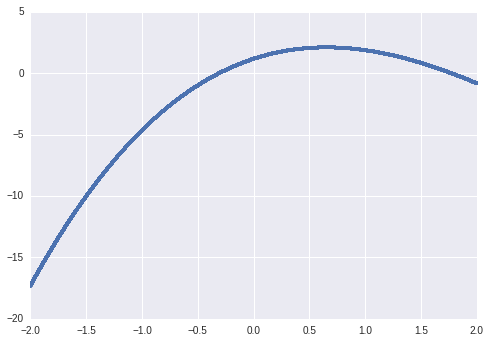

In [5]:
grado=4
tamano=100000
x,y,coeficentes=gdt.generar_muestra(grado,tamano)
print ("Coeficientes: ",coeficentes)
plt.plot(x,y,'.')

## Problema
**Calcular los coeficientes que mejor se ajusten a la muestra sabiendo que es de grado 5**

Generamos la matriz de coeficientes de grado 5

In [6]:
train_x=gdt.generar_matriz_coeficientes(x,grado) # MatrizA
train_y=np.reshape(y,(y.shape[0],-1)) # VectorColumna

### Solucion 1: Por medio *gradient descent*
Se va a calcular minimizando *ecm* por medio de *GradientDescent*

In [7]:
pesos_gd,ecm,t_c_gd=gdt.regression_gradient_descent(train_x,train_y,diff_error_parada=1e-4)

Iteracion 0:
	Pesos: [-0.04468783  0.09770893 -0.13242336  0.24288683]
	ecm: 32.33792495727539
Iteracion 200:
	Pesos: [ 0.74361557  1.78906322 -2.35499501  0.7108506 ]
	ecm: 0.3915315270423889
Iteracion 400:
	Pesos: [ 1.0816673   2.42115355 -2.51434565  0.48493838]
	ecm: 0.07090514153242111
Iteracion 600:
	Pesos: [ 1.15774202  2.71678567 -2.55020499  0.37927791]
	ecm: 0.014763785526156425
Iteracion 618:
	Pesos: [ 1.16051686  2.73395753 -2.55151296  0.3731406 ]
	ecm: 0.012852116487920284
-------------------------------------------------------------------------
Iteracion 618:
	Pesos: [ 1.16051686  2.73395753 -2.55151296  0.3731406 ]
	ecm: 0.012852116487920284
-------------------------------------------------------------------------
Tiempo de calculo: 8.751079082489014


Mostramos la curva de error por iteracion

### Solución 2: Por medio *stochastic gradient descent*
Mucho mas rápido para grandes volumenes de datos

In [34]:
pesos_sgd,ecm,t_c_sgd=gdt.regression_stochastic_gradient_descent(train_x,train_y,1,diff_error_parada=1e-4)

En cada iteracion se usará:  100000.0  entradas
Iteracion 200:
	Pesos: [ 0.74035037  1.7845428  -2.35345578  0.71246618]
	ecm: 0.39516589045524597
Iteracion 400:
	Pesos: [ 1.0809325   2.41903901 -2.51399922  0.48569414]
	ecm: 0.07147883623838425
Iteracion 600:
	Pesos: [ 1.15757668  2.71579671 -2.55012703  0.37963131]
	ecm: 0.01487808395177126
Iteracion 619:
	Pesos: [ 1.16051686  2.73395753 -2.55151296  0.3731406 ]
	ecm: 0.012852112762629986
Tiempo de calculo: 23.92095971107483
Numero de muestras utilizadas: 61900000


## Resultados:

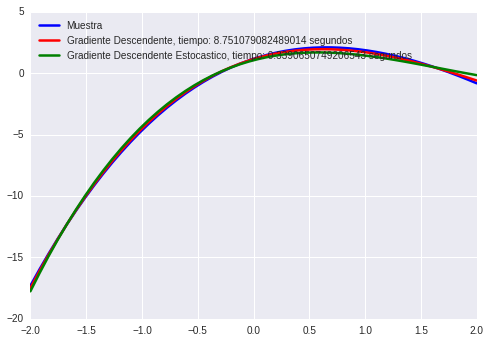

In [9]:
plt=gdt.grafica_resultados(coeficentes,pesos_gd,pesos_sgd,t_c_gd,t_c_sgd)
plt.show()

In [19]:
(0.339/(100*382))/(8.45/(100000*618))


64.90349763003812

In [16]:
(100000*618)/(100*382)

1617.8010471204188

In [12]:
0.339/382

0.0008874345549738221

In [14]:
0.014158576051779935/0.0008874345549738221

15.954501627669424